In [115]:
import numpy as num
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
HI_SFR_Pipe3D = fits.open("HI_SFR_Pipe3D", memmap=True)

In [117]:
HI_SFR_Pipe3D.info()

Filename: HI_SFR_Pipe3D
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (22490,)   uint8   
  1  Joined        1 BinTableHDU    561   2978R x 212C   [K, K, 12A, 10A, K, 4A, 20A, L, E, E, E, E, K, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, 8A, 8A, 8A, 8A, K, K, 14A, 14A, 14A, 14A, 14A, 14A, 10A, E, 15A, 10A, K, E, 4E, 4E, E, E, 3E, 3E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 46E, 46E, 46E, 46E, 46E, E, E, 11A, 9A, D, D, E, 79A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 128A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 128A, J, J]   


In [118]:
print(HI_SFR_Pipe3D[1].columns)

ColDefs(
    name = 'PLATE_1'; format = 'K'
    name = 'IFUDESIGN'; format = 'K'
    name = 'PLATEIFU_1'; format = '12A'
    name = 'MANGAID_1'; format = '10A'
    name = 'DRPALLINDX'; format = 'K'
    name = 'MODE'; format = '4A'
    name = 'DAPTYPE'; format = '20A'
    name = 'DAPDONE'; format = 'L'
    name = 'OBJRA_1'; format = 'E'
    name = 'OBJDEC_1'; format = 'E'
    name = 'IFURA'; format = 'E'
    name = 'IFUDEC'; format = 'E'
    name = 'MNGTARG1'; format = 'K'
    name = 'MNGTARG2'; format = 'K'
    name = 'MNGTARG3'; format = 'K'
    name = 'Z'; format = 'E'
    name = 'LDIST_Z'; format = 'E'
    name = 'ADIST_Z'; format = 'E'
    name = 'NSA_Z'; format = 'E'
    name = 'NSA_ZDIST'; format = 'E'
    name = 'LDIST_NSA_Z'; format = 'E'
    name = 'ADIST_NSA_Z'; format = 'E'
    name = 'NSA_ELPETRO_BA'; format = 'E'
    name = 'NSA_ELPETRO_PHI'; format = 'E'
    name = 'NSA_ELPETRO_TH50_R'; format = 'E'
    name = 'NSA_SERSIC_BA'; format = 'E'
    name = 'NSA_SERSIC_PHI'; for

In [119]:
HI_SFR_Pipe3D_Table = Table(HI_SFR_Pipe3D[1].data)

In [120]:
HI_SFR_Pipe3D_Table

PLATE_1,IFUDESIGN,PLATEIFU_1,MANGAID_1,DRPALLINDX,MODE,DAPTYPE,DAPDONE,OBJRA_1,OBJDEC_1,IFURA,IFUDEC,MNGTARG1,MNGTARG2,MNGTARG3,Z,LDIST_Z,ADIST_Z,NSA_Z,NSA_ZDIST,LDIST_NSA_Z,ADIST_NSA_Z,NSA_ELPETRO_BA,NSA_ELPETRO_PHI,NSA_ELPETRO_TH50_R,NSA_SERSIC_BA,NSA_SERSIC_PHI,NSA_SERSIC_TH50,NSA_SERSIC_N,VERSDRP2,VERSDRP3,VERSCORE,VERSUTIL,VERSDAP,DRP3QUAL,DAPQUAL,RDXQAKEY,BINKEY,SCKEY,ELMKEY,ELFKEY,SIKEY,BINTYPE,BINSNR,TPLKEY,DATEDAP,DAPBINS,RCOV90,SNR_MED [4],SNR_RING [4],SB_1RE,BIN_RMAX,BIN_R_N [3],BIN_R_SNR [3],STELLAR_Z,STELLAR_VEL_LO,STELLAR_VEL_HI,STELLAR_VEL_LO_CLIP,STELLAR_VEL_HI_CLIP,STELLAR_SIGMA_1RE,STELLAR_CONT_RCHI2_1RE,HA_Z,HA_GVEL_LO,HA_GVEL_HI,HA_GVEL_LO_CLIP,HA_GVEL_HI_CLIP,HA_GSIGMA_1RE,HA_GSIGMA_HI,HA_GSIGMA_HI_CLIP,EMLINE_SFLUX_CEN [22],EMLINE_SFLUX_1RE [22],EMLINE_SFLUX_TOT [22],EMLINE_SSB_1RE [22],EMLINE_SSB_PEAK [22],EMLINE_SEW_1RE [22],EMLINE_SEW_PEAK [22],EMLINE_GFLUX_CEN [22],EMLINE_GFLUX_1RE [22],EMLINE_GFLUX_TOT [22],EMLINE_GSB_1RE [22],EMLINE_GSB_PEAK [22],EMLINE_GEW_1RE [22],EMLINE_GEW_PEAK [22],SPECINDEX_LO [46],SPECINDEX_HI [46],SPECINDEX_LO_CLIP [46],SPECINDEX_HI_CLIP [46],SPECINDEX_1RE [46],SFR_1RE,SFR_TOT,PLATEIFU_2,MANGAID_2,OBJRA_2,OBJDEC_2,VOPT,SESSION,EXP,RMS,LOGHILIM200KMS,PEAK,SNR,FHI,EFHI,LOGMHI,VHI,EV,WM50,WP50,WP20,W2P50,WF50,PR,PL,AR,BR,AL,BL,mangaid,objra,objdec,redshift,re_arc,pa,ellip,dl,re_kpc,log_mass,e_log_mass,log_sfr_ha,e_log_sfr_ha,log_sfr_ssp,e_log_sfr_ssp,log_mass_gas,e_log_mass_gas,age_lw_re_fit,e_age_lw_re_fit,alpha_age_lw_re_fit,e_alpha_age_lw_re_fit,age_mw_re_fit,e_age_mw_re_fit,alpha_age_mw_re_fit,e_alpha_age_mw_re_fit,zh_lw_re_fit,e_zh_lw_re_fit,alpha_zh_lw_re_fit,e_alpha_zh_lw_re_fit,zh_mw_re_fit,e_zh_mw_re_fit,alpha_zh_mw_re_fit,e_alpha_zh_mw_re_fit,av_ssp_re,e_av_ssp_re,av_gas_re,e_av_gas_re,oh_re_fit_o3n2,e_oh_re_fit_o3n2,alpha_oh_re_fit_o3n2,e_alpha_oh_re_fit_o3n2,oh_re_fit_n2,e_oh_re_fit_n2,alpha_oh_re_fit_n2,e_alpha_oh_re_fit_n2,oh_re_fit_ons,e_oh_re_fit_ons,alpha_oh_re_fit_ons,e_alpha_oh_re_fit_ons,oh_re_fit_pyqz,e_oh_re_fit_pyqz,alpha_oh_re_fit_pyqz,e_alpha_oh_re_fit_pyqz,oh_re_fit_t2,e_oh_re_fit_t2,alpha_oh_re_fit_t2,e_alpha_oh_re_fit_t2,oh_re_fit_m08,e_oh_re_fit_m08,alpha_oh_re_fit_m08,e_alpha_oh_re_fit_m08,oh_re_fit_t04,e_oh_re_fit_t04,alpha_oh_re_fit_t04,e_alpha_oh_re_fit_t04,no_re_fit_epm09,e_no_re_fit_epm09,alpha_no_re_fit_epm09,e_alpha_no_re_fit_epm09,no_re_fit_n2s2,e_no_re_fit_n2s2,alpha_no_re_fit_n2s2,e_alpha_no_re_fit_n2s2,log_nii_ha_cen,e_log_nii_ha_cen,log_oiii_hb_cen,e_log_oiii_hb_cen,log_sii_ha_cen,e_log_sii_ha_cen,log_oii_hb_cen,e_log_oii_hb_cen,ew_ha_cen,e_ew_ha_cen,ion_class_cen,sigma_cen,e_sigma_cen,sigma_cen_ha,e_sigma_cen_ha,vel_sigma_re,e_vel_sigma_re,lambda_re,e_lambda_re,plateifu,plate_2,ifudsgn
int64,int64,str12,str10,int64,str4,str20,bool,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str8,str8,str8,str8,int64,int64,str14,str14,str14,str14,str14,str14,str10,float32,str15,str10,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str11,str9,float64,float64,float32,str79,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str128,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,f

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope             intercept     
    -------------------- ------------------
    -0.21288294200587574 -8.002376894508544


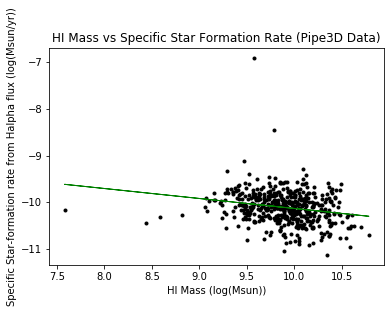

In [219]:
# To omit ouliers from MHI and SFR : Take 9 < MHI < 10.5, 0.0 < SFR < 0.8

plt.xlabel("HI Mass (log(Msun))")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("HI Mass vs Specific Star Formation Rate (Pipe3D Data)")

SFRall = num.array(HI_SFR_Pipe3D_Table['log_sfr_ha'])  # Stores all data of SFR
MHIall = num.array(HI_SFR_Pipe3D_Table['LOGMHI'])      # Stores all data of MHI
SMall = num.array(HI_SFR_Pipe3D_Table['log_mass'])    # Stores all data of SM

SFR = SFRall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores SFR data of positive MHI and SFR
MHI = MHIall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores MHI data of positive MHI and SFR
SM = SMall[num.where((SFRall > 0) & (MHIall > 0))]   # Stores SM data of positive MHI and SFR

# SFRfit = SFR[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores SFR data of a range that is included in best fit
# MHIfit = MHI[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]    # Stores MHI data of a range that is included in best fit
# SMfit = SM[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores MHI data of a range that is included in best fit


SSFR = SFR - SM                     # SSFR = Specific Star Formation Rate = Star Formation rate - Stellar mass
# SSFRfit = SFRfit - SMfit            # SSFR Data for fits purpose only

# print(len(SFRall)) #------------ 2978
# print(len(SFR))    #------------ 483
# print(len(SFRfit)) #------------ 441

plt.plot(MHI, SSFR, "k.")           # Making plot of MHI and SSFR with positive MHI and SFR only
# plt.ylim(-9.5, -11)
# plt.xlim(9, 10.5)

model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, MHI, SSFR)
print(best_fit)
plt.plot(MHI, best_fit(MHI), color='g', linewidth=1) # A line of best fit that includes data from a range

plt.show()

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope           intercept     
    ----------------- ------------------
    0.505695761550255 -9.839695704731147


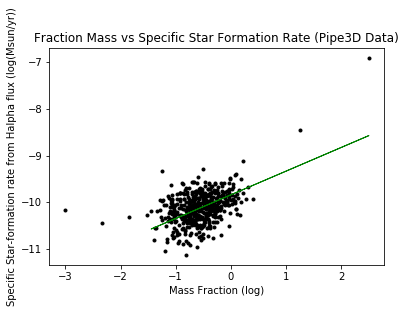

In [215]:
plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Fraction Mass vs Specific Star Formation Rate (Pipe3D Data)")

SFRall = num.array(HI_SFR_Pipe3D_Table['log_sfr_ha']) #SFR = Star Formation Rate
MHIall = num.array(HI_SFR_Pipe3D_Table['LOGMHI'])     #MHI = HI Mass
SMall = num.array(HI_SFR_Pipe3D_Table['log_mass'])    #SM = Stellar Mass

SFR = SFRall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores SFR data of positive MHI and SFR
MHI = MHIall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores MHI data of positive MHI and SFR
SM = SMall[num.where((SFRall > 0) & (MHIall > 0))]   # Stores SM data of positive MHI and SFR

SFRfit = SFR[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores SFR data of a range that is included in best fit
MHIfit = MHI[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]    # Stores MHI data of a range that is included in best fit
SMfit = SM[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores MHI data of a range that is included in best fit


FM = MHI - SM                                      #FM = Fraction Mass = log(HIMass) - log(StellarMass)
FMfit = MHIfit - SMfit 
SSFR = SFR - SM
SSFRfit = SFRfit - SMfit

plt.plot(FM, SSFR, "k.")
# plt.ylim(-15, -8)
# plt.xlim(-2, 2)

model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, FMfit, SSFRfit)
print(best_fit)
plt.plot(FMfit, best_fit(FMfit), color='g', linewidth=1)

plt.show()

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope             intercept     
    ------------------ -------------------
    0.9406149031059592 -22.532058874713865


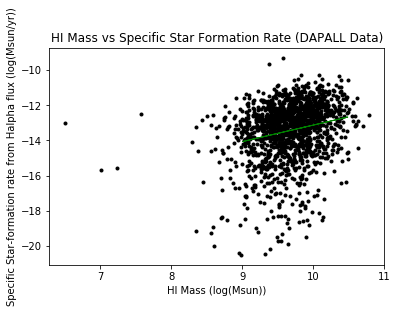

In [216]:
plt.xlabel("HI Mass (log(Msun))")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("HI Mass vs Specific Star Formation Rate (DAPALL Data)")

SFRall = num.array(HI_SFR_Pipe3D_Table['SFR_1RE'])
MHIall = num.array(HI_SFR_Pipe3D_Table['LOGMHI'])
SMall = num.array(HI_SFR_Pipe3D_Table['log_mass'])

SFR = SFRall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores SFR data of positive MHI and SFR
MHI = MHIall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores MHI data of positive MHI and SFR
SM = SMall[num.where((SFRall > 0) & (MHIall > 0))]   # Stores SM data of positive MHI and SFR

SFRfit = SFR[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores SFR data of a range that is included in best fit
MHIfit = MHI[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]    # Stores MHI data of a range that is included in best fit
SMfit = SM[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores MHI data of a range that is included in best fit


SFRlog = num.log(SFR)
SFRlogfit = num.log(SFRfit)
SSFR = SFRlog - SM
SSFRfit = SFRlogfit - SMfit

plt.plot(MHI, SSFR, "k.")
# plt.xlim(8, 11)

model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, MHIfit, SSFRfit)
print(best_fit)
plt.plot(MHIfit, best_fit(MHIfit), color='g', linewidth=1)

plt.show()

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope             intercept     
    ------------------- -------------------
    -0.0851809822419809 -13.434587516101164


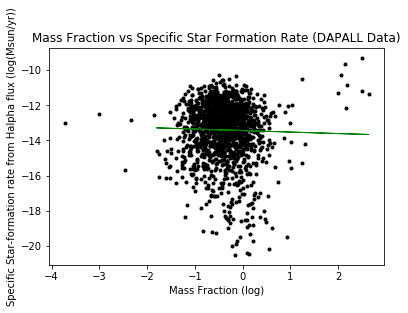

In [217]:
plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Mass Fraction vs Specific Star Formation Rate (DAPALL Data)")

SFRall = num.array(HI_SFR_Pipe3D_Table['SFR_1RE']) #SFR = Star Formation Rate
MHIall = num.array(HI_SFR_Pipe3D_Table['LOGMHI']) #MHI = HI Mass
SMall = num.array(HI_SFR_Pipe3D_Table['log_mass']) #SM = Stellar Mass

SFR = SFRall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores SFR data of positive MHI and SFR
MHI = MHIall[num.where((SFRall > 0) & (MHIall > 0))]  # Stores MHI data of positive MHI and SFR
SM = SMall[num.where((SFRall > 0) & (MHIall > 0))]   # Stores SM data of positive MHI and SFR

SFRfit = SFR[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores SFR data of a range that is included in best fit
MHIfit = MHI[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]    # Stores MHI data of a range that is included in best fit
SMfit = SM[num.where((SFR > 0) & (MHI > 9) & (SFR < 0.8) & (MHI < 10.5))]     # Stores MHI data of a range that is included in best fit

SFRlog = num.log(SFR)
SFRlogfit = num.log(SFRfit)
FM = MHI - SM                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
SSFR = SFRlog - SM
FMfit = MHIfit - SMfit                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
SSFRfit = SFRlogfit - SMfit

plt.plot(FM, SSFR, "k.")
# plt.xlim(-2, 2)

model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, FMfit, SSFRfit)
print(best_fit)
plt.plot(FMfit, best_fit(FMfit), color='g', linewidth=1)

plt.show()                           